# E-tivity 3: Clustering and Manifold Learning

## Name: Martin Power
## ID      : 9939245

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import FixedFormatter

# Table of Contents

#### Task 1
* [Task 1 Code](#task1)
* [Task 1 - Feature Scaling](#task1_scale)
* [Task 1 - MDS Visualisation](#task1_mds)
* [Task 1 - t-SNE Visualisation](#task1_tsne)
* [Task 1 - Cluster Description](#task1_desc)
* [Task 1 - Cluster Characteristics](#task1_cha)

#### Task 2
* [Task 2 Code](#task2)
* [Task 2 -  Sum of Squared Distances Plot](#task2_plot)
* [Task 2 -  Elbow Method to Find Best k](#task2_elbow)
* [Task 2 -  Silhouette Coefficient Method to Find Best k](#task2_sc)
* [Task 2 -  Additional Clustering Algorithm](#task2_add_algo)
* [Task 2 -  Additional Manifold Learning Technique](#task2_add_man)
* [Task 2 -  Visual Comparison of Clusterings](#task2_vcomp)
* [Task 2 -  Difference Between K-Means And Second Algorithm Discussion](#task2_diff)

<a id='task1'></a>

# Task 1 (CS5062)

In [2]:
df = pd.read_csv("./loans_dataset_et3.csv")

print("Number of Samples  in Dataset:\t",df.shape[0])
print("Number of Features in Dataset:\t",df.shape[1])

Number of Samples  in Dataset:	 332
Number of Features in Dataset:	 5


In [3]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


<a id='task1_scale'></a>

In [4]:
df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
327,5417,4196.0,267,360,1
328,16666,0.0,275,360,1
329,10750,0.0,312,360,1
330,5955,5625.0,315,360,1
331,6133,3906.0,324,360,1


In [5]:
# Print statistical summary for all attributes
df.describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [6]:
# Quick Check to Ensure no missing data
print(df.isnull().any())

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
dtype: bool


In [7]:
def plot_hist_with_box(feature):
    # From https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    #sns.boxplot(df[feature], ax=ax_box)
    #sns.distplot(df[feature], ax=ax_hist)
    sns.boxplot(feature, ax=ax_box)
    sns.distplot(feature, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()
    return

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


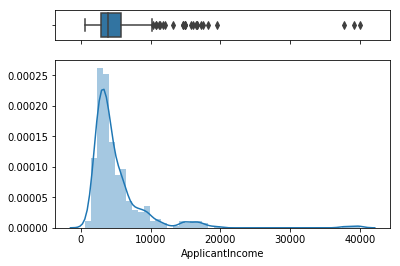

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


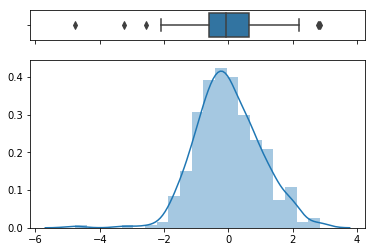

In [8]:
plot_hist_with_box(df['ApplicantIncome'])
plot_hist_with_box(power_transform(np.expand_dims(df['ApplicantIncome'], axis=1), method='box-cox'))

#df['bc_age'] = power_transform(np.expand_dims(df['age'], axis=1), method='box-cox')

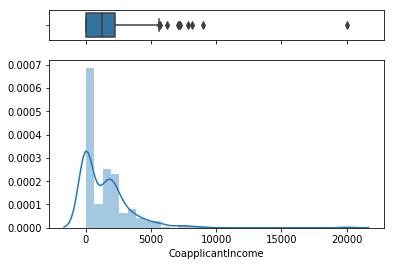

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


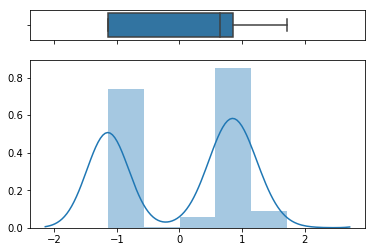

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


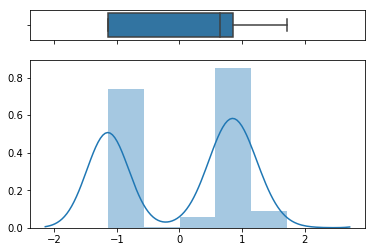

In [9]:
plot_hist_with_box(df['CoapplicantIncome'])
plot_hist_with_box(power_transform(np.expand_dims(df['CoapplicantIncome'], axis=1), method='yeo-johnson'))
plot_hist_with_box(power_transform(np.expand_dims(df['CoapplicantIncome']+1, axis=1), method='box-cox'))

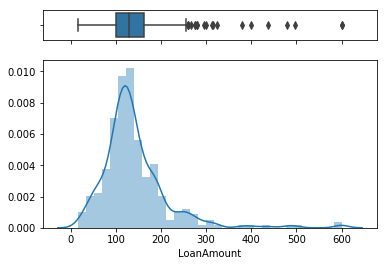

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


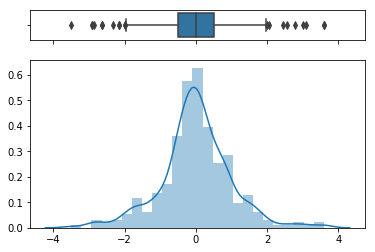

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


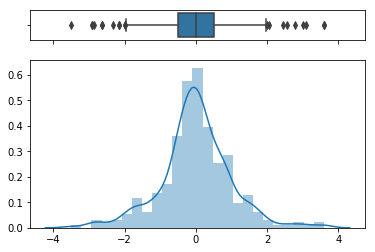

In [10]:
plot_hist_with_box(df['LoanAmount'])
plot_hist_with_box(power_transform(np.expand_dims(df['LoanAmount'], axis=1), method='yeo-johnson'))
plot_hist_with_box(power_transform(np.expand_dims(df['LoanAmount']+1, axis=1), method='box-cox'))

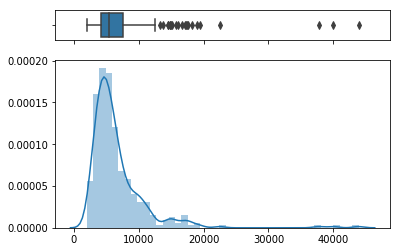

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


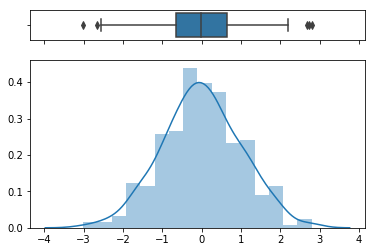

In [11]:
plot_hist_with_box(df['ApplicantIncome']+df['CoapplicantIncome'])
plot_hist_with_box(power_transform(np.expand_dims(df['ApplicantIncome']+df['CoapplicantIncome'], axis=1), method='box-cox'))

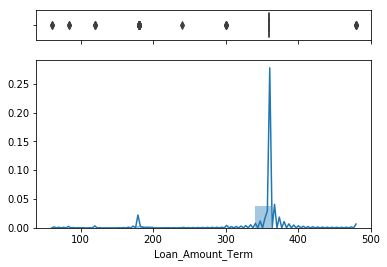

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


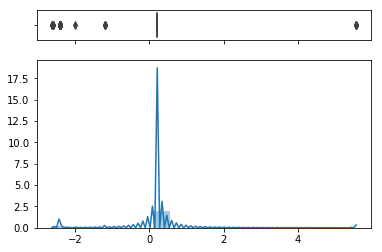

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


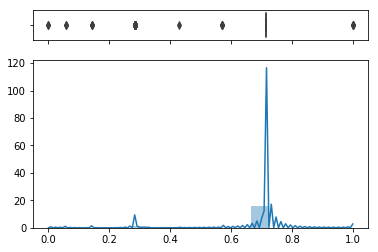

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


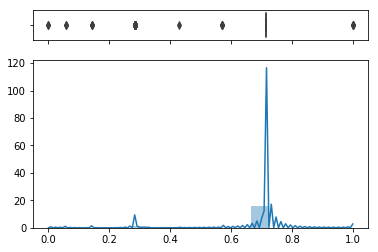

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


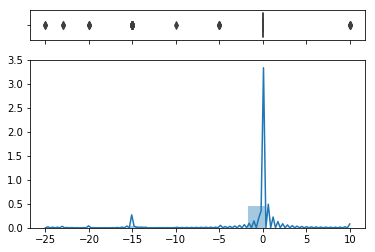

In [12]:
plot_hist_with_box(df['Loan_Amount_Term'])
plot_hist_with_box(power_transform(np.expand_dims(df['Loan_Amount_Term'], axis=1), method='box-cox'))

min_max_scaler = preprocessing.MinMaxScaler()
#lab3_data = min_max_scaler.fit_transform(lab3_data)
plot_hist_with_box(min_max_scaler.fit_transform(np.expand_dims(df['Loan_Amount_Term'], axis=1)))

#min_max_scaler = preprocessing.MinMaxScaler()
#lab3_data = min_max_scaler.fit_transform(lab3_data)
plot_hist_with_box(min_max_scaler.fit_transform(np.expand_dims(df['Loan_Amount_Term']/12, axis=1)))

robust_scaler = preprocessing.RobustScaler()
#lab3_data = min_max_scaler.fit_transform(lab3_data)
plot_hist_with_box(robust_scaler.fit_transform(np.expand_dims(df['Loan_Amount_Term']/12, axis=1)))

In [13]:
df['Loan_Amount_Term'].unique()
df['Loan_Amount_Term'].value_counts()

360    292
180     24
480      4
300      4
120      3
84       2
60       2
240      1
Name: Loan_Amount_Term, dtype: int64

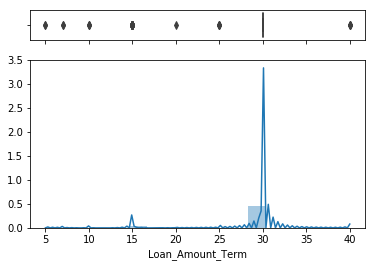

In [14]:
plot_hist_with_box(df['Loan_Amount_Term']/12)

## Task 1 - Feature Scaling

In [15]:
#X_raw = df.drop('Credit_History', axis=1)
#y     = df['Credit_History']

In [16]:
#X_raw.head()

In [17]:
scale_df = pd.DataFrame()

In [18]:
scale_df = scale_df.append(df, ignore_index = True)


<a id='task1_mds'></a>

In [19]:
scale_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [20]:
scale_df['ApplicantIncome'] = power_transform(np.expand_dims(scale_df['ApplicantIncome'], axis=1), method='box-cox')

In [21]:
scale_df['CoapplicantIncome'] = power_transform(np.expand_dims(df['CoapplicantIncome'], axis=1), method='yeo-johnson')

In [22]:
scale_df['LoanAmount'] = power_transform(np.expand_dims(df['LoanAmount'], axis=1), method='box-cox')

In [23]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#lab3_data = min_max_scaler.fit_transform(lab3_data)
scale_df['Loan_Amount_Term'] = min_max_scaler2.fit_transform(np.expand_dims(df['Loan_Amount_Term'], axis=1))

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
scale_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.953956,0.894000,-0.693351,0.285714,0
1,0.365355,-1.144174,0.038117,0.714286,0
2,0.048866,-1.144174,-2.159374,0.285714,1
3,-0.065021,1.000026,0.220378,0.285714,1
4,0.796042,-1.144174,0.430889,0.285714,1


In [25]:
# Reusing code from Lab3

# Fixed typo in code where 'blue' appeared twice. Replaced with 'yellow'
colors = np.array(['orange', 'blue', 'lime', 'yellow', 'khaki', 'pink', 'green', 'purple'])

bookcolors_key = np.array(['crimson', 'red', 'redorange', 'orange', 'yellow', 'sky', 'babyblue', 'lightblue', 'blue', 'purple'])

bookcolors = {
         'crimson': '#a50026', 'red': '#d73027',
         'redorange': '#f46d43', 'orange': '#fdae61',
         'yellow': '#fee090', 'sky': '#e0f3f8',
         'babyblue': '#abd9e9', 'lightblue': '#74add1',
         'blue': '#4575b4', 'purple': '#313695'
     }

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        #c=bookcolors[bookcolors_key[i%bookcolors_key.size]],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [26]:
scale_data = np.array(scale_df.values, dtype=float)
print('(number of examples, number of attributes): ', scale_data.shape)

(number of examples, number of attributes):  (332, 5)


In [27]:
k = 4

In [28]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(scale_data)

In [29]:
# append the cluster centers to the dataset
scale_data_and_centers = np.r_[scale_data,clustered_data_sklearn.cluster_centers_]

## Task 1 - MDS Visualisation

In [30]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(scale_data_and_centers)
print("transformation complete")

transformation complete


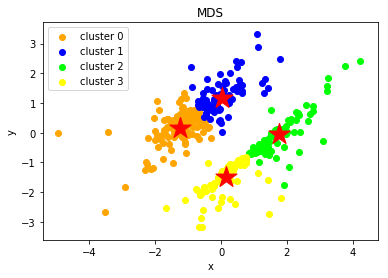

In [31]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

<a id='task1_tsne'></a>

## Task 1 - t-SNE Visualisation

In [32]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(scale_data_and_centers)
print("transformation complete")

transformation complete


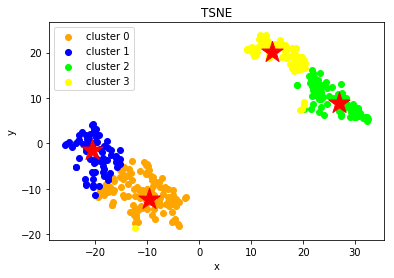

In [33]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

<a id='task1_desc'></a>

## Task 1 - Cluster Description

In [34]:
# Append the cluster labels to the original data
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [35]:
df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,2673.684211,2341.208772,112.614035,346.210526,0.982456
1,5888.840000,3047.506667,182.813333,344.000000,0.973333
2,9407.160000,0.000000,195.333333,336.800000,0.960000
3,4040.632353,15.413529,81.970588,337.058824,1.000000


<a id='task1_char'></a>

## Task 1 - Cluster Characteristics

<a id='task2'></a>

# Task 2 (CS5062)

<a id='task2_plot'></a>

## Task 2 - Sum of Squared Distances Plot

In [ ]:
min_k = 2
max_k = 8

kvals = np.array(range(min_k,max_k+1))

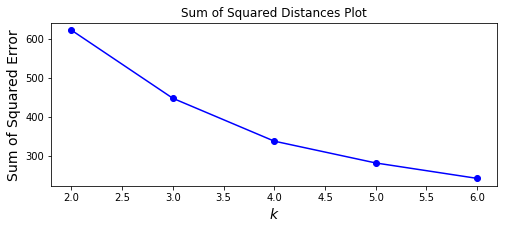

In [72]:
sse = np.empty(len(kvals))

for i in range(len(kvals)):
    clustered_data_sklearn = cluster.KMeans(n_clusters=kvals[i], n_init=10, max_iter=300).fit(scale_data)
    
    # Store Sum of Squared Error Value
    sse[i] = clustered_data_sklearn.inertia_     


plt.figure(figsize=(8, 3))
plt.title("Sum of Squared Distances Plot") 
plt.plot(kvals,  sse, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Sum of Squared Error", fontsize=14)
plt.show()

<a id='task2_elbow'></a>

## Task 2 - Elbow Method to Find Best k

<a id='task2_sc'></a>

## Task 2 - Silhouette Coefficient Method to Find Best k

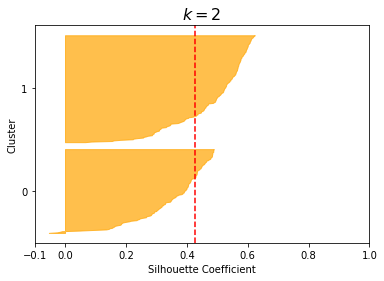

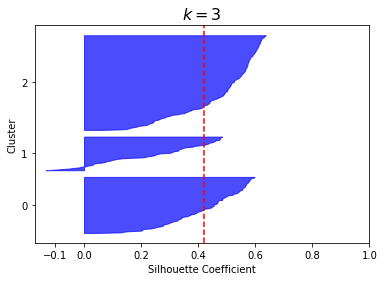

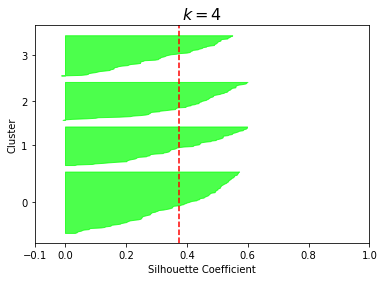

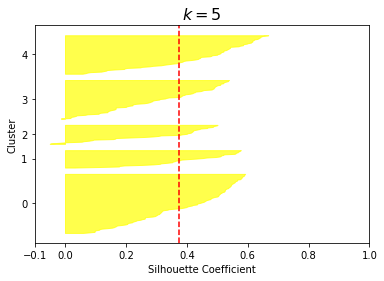

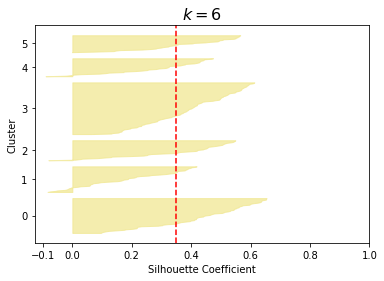

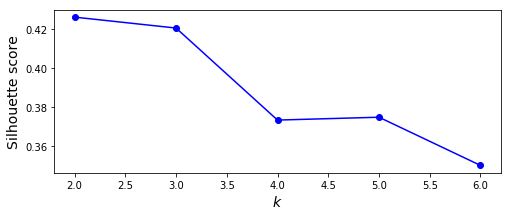

For k = 2 The average silhouette_score is : 0.42630207137288095
For k = 3 The average silhouette_score is : 0.42066087054979273
For k = 4 The average silhouette_score is : 0.3731517986017694
For k = 5 The average silhouette_score is : 0.37463248427204726
For k = 6 The average silhouette_score is : 0.349760285182019


In [74]:
# From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# From https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

# Empty Array to Store Silhouette values
silhouette_avg = np.empty(len(kvals))


for i in range(len(kvals)):

    clustered_data_sklearn = cluster.KMeans(n_clusters=kvals[i], n_init=10, max_iter=300).fit(scale_data)
    
    cluster_labels = clustered_data_sklearn.labels_
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg[i] = silhouette_score(scale_data, cluster_labels)
    
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scale_data, cluster_labels)

    padding = len(scale_data) // 30
    pos = padding
    ticks = []
    

    for j in range(kvals[i]):
        coeffs = sample_silhouette_values[cluster_labels==j]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=colors[i%colors.size], edgecolor=colors[i%colors.size], alpha=0.7)
        
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(kvals[i])))
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.axvline(x=silhouette_avg[i], color="red", linestyle="--")
    plt.title("$k={}$".format(kvals[i]), fontsize=16)
    plt.show()
    

# Plot Silhoette Scores

plt.figure(figsize=(8, 3))
plt.plot(kvals,  silhouette_avg, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

for i in range(len(kvals)):    
    print("For k =", kvals[i], "The average silhouette_score is :", silhouette_avg[i])  

<a id='task2_add_algo'></a>

## Task 2 - Additional Clustering Algorithm

<a id='task2_add_man'></a>

## Task 2 - Additional Manifold Learning Technique

<a id='task2_vcomp'></a>

## Task 2 - Visual Comparison of Clusterings

<a id='task2_diff'></a>

## Task 2 - Difference Between K-Means And Second Algorithm Discussion